In [1]:
dates = ["2021-02-07",
         "2020-10-09",
         "2020-08-20", "2020-05-08", "2020-02-13",
         "2019-11-19", "2019-08-08", "2019-05-05", "2019-02-03",
         "2018-11-04", "2018-08-07", "2018-05-09", "2018-03-07",
         "2017-05-02", "2017-03-02",
         "2016-08-03", "2016-05-02", "2016-01-02",
         "2015-11-06", "2015-07-25", "2015-05-24"
         ]

In [4]:
import pandas as pd
reviews = pd.read_csv("/Users/huangbenson/Downloads/reviews.csv")
reviews.head()

/Users/huangbenson/.pyenv/versions/3.7.8/envs/05839-3.7.8/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,listing_id,date
0,109,2011-08-15
1,109,2016-05-15
2,2708,2014-06-09
3,2708,2014-06-23
4,2708,2015-07-25


In [14]:
import requests
import urllib.request
from io import StringIO, BytesIO
import gzip
def gzip_str(string_: str) -> bytes:
    out = BytesIO()

    with gzip.GzipFile(fileobj=out, mode='w') as fo:
        fo.write(string_.encode())

    bytes_obj = out.getvalue()
    return bytes_obj


def gunzip_bytes_obj(bytes_obj: bytes) -> str:
    return gzip.decompress(bytes_obj).decode()


string_ = 'hello there!'

gzipped_bytes = gzip_str(string_)

original_string = gunzip_bytes_obj(gzipped_bytes)

dates = ["2021-02-07",
         "2020-10-09", "2020-08-20", "2020-05-08", "2020-02-13",
         "2019-11-19", "2019-08-08", "2019-05-05", "2019-02-03",
         "2018-11-04", "2018-08-07", "2018-05-09", "2018-03-07",
         "2017-05-02", "2017-03-02",
         "2016-08-03", "2016-05-02", "2016-01-02",
         "2015-11-06", "2015-07-25", "2015-05-24"
         ]
types = ["reviews.csv.gz", "calendar.csv.gz"]
for d in dates:
    for t in types:

        URL = f"http://data.insideairbnb.com/united-states/ca/los-angeles/{d}/data/{t}"

        if t.endswith("gz"):
            with urllib.request.urlopen(URL) as response:
                with gzip.GzipFile(fileobj=response) as uncompressed:
                    file_content = uncompressed.read()

                t = t[0 : t.find("gz")-1]
                with open(f"/Users/huangbenson/Work/cmu/05-839/assignments/a3/data/{d}_{t}", 'wb') as f:
                    f.write(file_content)

            print("finished download")

        else:
            response = requests.get(url=URL)
            listing_pd = pd.read_csv(StringIO(response.text))
            listing_pd.to_csv(f"/Users/huangbenson/Work/cmu/05-839/assignments/a3/data/{d}_{t}")


finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download
finished download


In [ ]:
g_file = requests.get(url="http://data.insideairbnb.com/united-states/ca/los-angeles/2015-11-06/data/reviews.csv.gz")


In [2]:
import zlib
ungziped_str = zlib.decompressobj().decompress('x\x9c' + g_file.content)

NameError: name 'g_file' is not defined

In [3]:
import pandas as pd
file_path = f"/Users/huangbenson/Work/cmu/05-839/assignments/a3/data/2021-02-07_listings.csv"
listing_pd = pd.read_csv(file_path)
# print(listing_pd.count())
# print(listing_pd.sample(100))
listing_pd = listing_pd.sample(100)
listing_pd["date"] = "2021-02-07"
listing_pd.head()


,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,date
15875,15875,29730148,Centrally located LA Apt. Walk to The Grove!,223664399,Aaron,City of Los Angeles,Fairfax,34.07803,-118.36015,Entire home/apt,75,30,11,2019-03-26,0.42,1,0,2021-02-07
17466,17466,32575497,"NEAR LAX, BEACH, CULVER CITY MALL GOOD AREA",5912703,Robinson,Other Cities,Culver City,33.98579,-118.38395,Private room,60,3,3,2019-06-11,0.14,2,365,2021-02-07
25394,25394,43576176,Modern 2 Bedroom Bungalow,250312632,Hoss,Unincorporated Areas,Altadena,34.18169,-118.14927,Entire home/apt,102,2,17,2021-01-28,2.24,47,79,2021-02-07
3022,3022,6031474,Redondo Beach/Hermosa Beach,7044596,Nabil,Other Cities,Redondo Beach,33.87125,-118.37281,Entire home/apt,249,7,2,2019-07-31,0.03,3,358,2021-02-07
30477,30477,47210316,Stay as long as you want | 3BR in Marina del Rey,368944610,Kia,City of Los Angeles,Venice,33.98729,-118.44590,Entire home/apt,251,31,0,NaN,NaN,106,336,2021-02-07


# mean price over time (listing)

In [22]:
import pandas as pd
dates = ["2021-02-07",
         "2020-10-09",
         "2020-08-20", "2020-05-08", "2020-02-13",
         "2019-11-19", "2019-08-08", "2019-05-05", "2019-02-03",
         "2018-11-04", "2018-08-07", "2018-05-09", "2018-03-07",
         "2017-05-02", "2017-03-02",
         "2016-08-03", "2016-05-02", "2016-01-02",
         "2015-11-06", "2015-07-25", "2015-05-24"
         ]
listing_pd = None
for d in dates:
    file_path = f"/Users/huangbenson/Work/cmu/05-839/assignments/a3/data/{d}_listings.csv"
    if listing_pd is None:
        listing_pd = pd.read_csv(file_path)
        listing_pd = listing_pd.sample(100)
        listing_pd["date"] = d + " 00:00:00"
        listing_pd["price"] = listing_pd.mean().price
    else:
        append_pd = pd.read_csv(file_path)
        append_pd = append_pd.sample(100)
        append_pd["date"] = d + " 00:00:00"
        append_pd["price"] = append_pd.mean().price
        listing_pd = pd.concat([listing_pd, append_pd], axis=0)

In [24]:
import altair as alt
listing_pd = listing_pd[listing_pd.price < 1600]
chart = alt.Chart(listing_pd).mark_circle(
    color='red',
    opacity=0.3
    ).encode(
	x=alt.X('date:T'),
	y=alt.Y('price:Q'),
)
chart + chart.transform_regression('date', 'price').mark_line()


alt.LayerChart(...)

# mean price over time 2 (calendar)

In [21]:
import pandas as pd
dates = ["2021-02-07",
         "2020-10-09",
         "2020-08-20", "2020-05-08", "2020-02-13",
         "2019-11-19", "2019-08-08", "2019-05-05", "2019-02-03",
         "2018-11-04", "2018-08-07", "2018-05-09", "2018-03-07",
         "2017-05-02", "2017-03-02",
         "2016-08-03", "2016-05-02", "2016-01-02",
         "2015-11-06", "2015-07-25", "2015-05-24"
         ]
listing_pd = None
def apply_date(date):
#     splited = date.split("/")
    return date + " 00:00:00"

for d in dates:
    file_path = f"/Users/huangbenson/Work/cmu/05-839/assignments/a3/data/{d}_calendar.csv"
    if listing_pd is None:
        listing_pd = pd.read_csv(file_path)
        listing_pd = listing_pd.sample(100)
        listing_pd.date = listing_pd.date.apply(apply_date)
        listing_pd["mean_price"] = listing_pd.mean().adjusted_price
    else:
        append_pd = pd.read_csv(file_path)
        append_pd = append_pd.sample(100)
        append_pd.date = append_pd.date.apply(apply_date)
        append_pd["mean_price"] = append_pd.mean().adjusted_price
        listing_pd = pd.concat([listing_pd, append_pd], axis=0)

AttributeError: 'Series' object has no attribute 'adjusted_price'

In [ ]:
d = "2021-02-07"
listing_pd = pd.read_csv(f"/Users/huangbenson/Work/cmu/05-839/assignments/a3/data/{d}_calendar.csv")
listing_pd = listing_pd.sample(100)
listing_pd.mean()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st

arr = np.random.normal(1, 1, size=100)

plt.hist(arr, bins=20)

st.pyplot()

/Users/huangbenson/.pyenv/versions/3.7.8/envs/05839-3.7.8/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
2021-04-22 19:47:22.265 WARNING root: 
  command:

    streamlit run /Users/huangbenson/.pyenv/versions/3.7.8/envs/05839-3.7.8/lib/python3.7/site-packages/ipykernel_launcher.py [ARGUMENTS]


<Figure size 432x288 with 0 Axes>

# seasonal review/price over time

In [ ]:
import pandas as pd
listing_pd = None
def apply_date(date):
#     splited = date.split("/")
    return date + " 00:00:00"

for d in dates:
    file_path = f"/Users/huangbenson/Work/cmu/05-839/assignments/a3/data/{d}_calendar.csv"
    if listing_pd is None:
        listing_pd = pd.read_csv(file_path)
        listing_pd = listing_pd.sample(100)
        listing_pd.date = listing_pd.date.apply(apply_date)
    else:
        append_pd = pd.read_csv(file_path)
        append_pd = append_pd.sample(100)
        append_pd.date = append_pd.date.apply(apply_date)
        listing_pd = pd.concat([listing_pd, append_pd], axis=0)


In [11]:
# prepare data
listing_pd_lst = []
for d in ["2015", "2016", "2017", "2018", "2019", "2020", "2021"]:
    listing_pd_lst.append(listing_pd[listing_pd.date.map(lambda x: x.startswith(d))])


In [12]:
listing_pd

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,date
849,849,644720,Guest Berdroom below Hollywood sign,823493,Mojgan,City of Los Angeles,Hollywood Hills,34.109979,-118.317852,Private room,249.49,3,1,2013-05-25,0.02,2,365.0,2018-11-04 00:00:00
24165,24165,20418636,Redondo Beach Area - Mediterranean House,48892487,Veronica,Other Cities,Rolling Hills Estates,33.780434,-118.340983,Entire home/apt,249.49,7,4,2018-10-20,0.32,2,80.0,2018-11-04 00:00:00
8175,8175,7966904,Charming Garden Cottage Near The Be,41730306,Dennis,Other Cities,Long Beach,33.770063,-118.138021,Entire home/apt,249.49,1,5,2018-09-30,0.16,2,109.0,2018-11-04 00:00:00
29178,29178,22613580,Secluded Gem,130355,Adi,City of Los Angeles,Studio City,34.143812,-118.408051,Entire home/apt,249.49,4,16,2018-09-30,1.66,1,185.0,2018-11-04 00:00:00
26363,26363,21448139,Echo Park Single Family Casa,1132333,Cami,City of Los Angeles,Echo Park,34.078180,-118.253119,Entire home/apt,249.49,7,2,2018-05-20,0.19,1,20.0,2018-11-04 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,9785,8702595,Independent and Comfortable Private Suite.,17222976,Carmen,NaN,Downey,33.931650,-118.116515,Private room,154.52,2,41,2018-01-30,1.55,1,345.0,2018-03-07 00:00:00
30989,30989,21205312,Gorgeous 4bd/5ba Beverly Hills Home w pool (63),75431354,Lina,NaN,Beverly Crest,34.107854,-118.427225,Entire home/apt,154.52,3,0,NaN,NaN,15,365.0,2018-03-07 00:00:00
9280,9280,8211978,"Fort Alibi; one room or entire house, prices vary",43302756,Biff,NaN,Valley Village,34.162342,-118.404890,Private room,154.52,1,3,2015-10-13,0.10,1,365.0,2018-03-07 00:00:00
9898,9898,8801380,"Affordable Loft Living, Downtown LA",41555535,Tee,NaN,Downtown,34.043674,-118.250966,Entire home/apt,154.52,1,90,2018-03-04,3.11,2,301.0,2018-03-07 00:00:00


In [20]:
st.vega_lite_chart({
  "data": {
    "values": [
      {"a": "C", "b": 2}, {"a": "C", "b": 7}, {"a": "C", "b": 4},
      {"a": "D", "b": 1}, {"a": "D", "b": 2}, {"a": "D", "b": 6},
      {"a": "E", "b": 8}, {"a": "E", "b": 4}, {"a": "E", "b": 7}
    ]
  },
  "mark": "bar",
  "encoding": {
    "y": {"field": "a", "type": "nominal"},
    "x": {
      "aggregate": "average", "field": "b", "type": "quantitative",
      "title": "Mean of b"
    }
  }
})

In [23]:
from vega_datasets import data
data_pd = data.cars()

# raw data

In [1]:
import pandas as pd
dates = ["2021-02-07",
         "2020-10-09",
         "2020-08-20", "2020-05-08", "2020-02-13",
         "2019-11-19", "2019-08-08", "2019-05-05", "2019-02-03",
         "2018-11-04", "2018-08-07", "2018-05-09", "2018-03-07",
         "2017-05-02", "2017-03-02",
         "2016-08-03", "2016-05-02", "2016-01-02",
         "2015-11-06", "2015-07-25", "2015-05-24"
         ]

/Users/huangbenson/.pyenv/versions/3.7.8/envs/05839-3.7.8/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
def apply_date(date):
#     splited = date.split("/")
    return date + " 00:00:00"

def apply_price(price):
    try:
        price = price.replace("$", "")
        price = price.replace(",", "")
        return float(price)
    except:
        return float(price)


In [4]:
import pandas as pd

calendar_pd = None

for d in dates:
    file_path = f"/Users/huangbenson/Work/cmu/05-839/assignments/a3/data/{d}_calendar.csv"
    if calendar_pd is None:
        calendar_pd = pd.read_csv(file_path)
        calendar_pd = calendar_pd.sample(100)
        calendar_pd.date = calendar_pd.date.apply(apply_date)
        calendar_pd.price = calendar_pd.price.apply(apply_price)
    else:
        append_pd = pd.read_csv(file_path)
        append_pd = append_pd.sample(100)
        append_pd.date = append_pd.date.apply(apply_date)
        append_pd.price = append_pd.price.apply(apply_price)
        calendar_pd = pd.concat([calendar_pd, append_pd], axis=0)

In [7]:
listing_pd = None
for d in dates:
    file_path = f"/Users/huangbenson/Work/cmu/05-839/assignments/a3/data/{d}_listings.csv"
    if listing_pd is None:
        listing_pd = pd.read_csv(file_path)
        listing_pd = listing_pd.sample(100)
        listing_pd["date"] = d + " 00:00:00"
        listing_pd.price = listing_pd.price.apply(apply_price)
    else:
        append_pd = pd.read_csv(file_path)
        append_pd = append_pd.sample(100)
        listing_pd["date"] = d + " 00:00:00"
        append_pd.price = append_pd.price.apply(apply_price)
        listing_pd = pd.concat([listing_pd, append_pd], axis=0)

In [8]:
review_pd = None
for d in dates:
    file_path = f"/Users/huangbenson/Work/cmu/05-839/assignments/a3/data/{d}_reviews.csv"
    if review_pd is None:
        review_pd = pd.read_csv(file_path)
        review_pd = review_pd.sample(100)
    else:
        append_pd = pd.read_csv(file_path)
        append_pd = append_pd.sample(100)
        review_pd = pd.concat([review_pd, append_pd], axis=0)

In [9]:
# add year & weekly chart & month
def add_year(date):
    return int(date[0: 4])

def add_month(date):
    return int(date[5: 7])

calendar_pd["year"] = calendar_pd.date.apply(add_year)
calendar_pd["month"] = calendar_pd.date.apply(add_month)

# add partial date
def add_partial_date(date):
    return date[5:10]

def add_clean_date(date):
    return date[0:10]

calendar_pd["partial_date"] = calendar_pd.date.apply(add_partial_date)
calendar_pd["clean_date"] = calendar_pd.date.apply(add_clean_date)

# add week of day
import datetime
week_of_day_mapping = {
    0: "Mon",
    1: "Tue",
    2: "Wed",
    3: "Thr",
    4: "Fri",
    5: "Sat",
    6: "Sun",
}

def add_week_ofday(date):
    date = datetime.datetime(int(date[0:4]), int(date[5:7]), int(date[8:10]))
    return week_of_day_mapping[date.weekday()]

calendar_pd["weekofday"] = calendar_pd.date.apply(add_week_ofday)

# word cloud
import paddlehub as hub
senta = hub.Module(name="senta_lstm")
def apply_positive(row):
    if type(row) != str:
        return "positive"
    else:
        return senta.sentiment_classify(data={"text": [row]})[0]["sentiment_key"]

review_pd["positive"] = review_pd.comments.apply(apply_positive)

# jieba
import jieba
def apply_jieba(row):
    a = jieba.cut(row)
    try:
        return list(jieba.cut(row.lower()))
    except:
        return []

review_pd["jieba"] = review_pd.comments.apply(apply_jieba)

# add year
def add_year(date):
    return int(date[0: 4])

review_pd["year"] = review_pd.date.apply(add_year)

/Users/huangbenson/.pyenv/versions/3.7.8/envs/05839-3.7.8/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):
/Users/huangbenson/.pyenv/versions/3.7.8/envs/05839-3.7.8/lib/python3.7/site-packages/paddle2onnx/onnx_helper/mapping.py:42: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; fo

In [12]:
calendar_pd.to_csv("/Users/huangbenson/Work/cmu/05-839/assignments/fp--05839-jpark-etatum-shuang/Data/processed/calendar.csv")
listing_pd.to_csv("/Users/huangbenson/Work/cmu/05-839/assignments/fp--05839-jpark-etatum-shuang/Data/processed/listing.csv")
review_pd.to_csv("/Users/huangbenson/Work/cmu/05-839/assignments/fp--05839-jpark-etatum-shuang/Data/processed/review.csv")

/Users/huangbenson/.pyenv/versions/3.7.8/envs/05839-3.7.8/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
from collections import defaultdict
review_map = {
    2010:defaultdict(int),
    2011:defaultdict(int),
    2012:defaultdict(int),
    2013:defaultdict(int),
    2014:defaultdict(int),
    2015:defaultdict(int),
    2016:defaultdict(int),
    2017:defaultdict(int),
    2018:defaultdict(int),
    2019:defaultdict(int),
    2020:defaultdict(int),
    2021:defaultdict(int)
}

pos_map = {

}

for index, row in review_pd.iterrows():
    for word in row["jieba"]:
        review_map[row["year"]][word] += 1
        pos_map[word] = row["positive"]

from nltk.corpus import stopwords
import nltk, re
import multidict as multidict

review_map_new = {
    2010:multidict.MultiDict(),
    2011:multidict.MultiDict(),
    2012:multidict.MultiDict(),
    2013:multidict.MultiDict(),
    2014:multidict.MultiDict(),
    2015:multidict.MultiDict(),
    2016:multidict.MultiDict(),
    2017:multidict.MultiDict(),
    2018:multidict.MultiDict(),
    2019:multidict.MultiDict(),
    2020:multidict.MultiDict(),
    2021:multidict.MultiDict()
}
stop = stopwords.words('english')

for year, dic in review_map.items():
    for k, v in dic.items():
        if k.lower() not in stop and bool(re.search('[a-z]', k)):
            review_map_new[year].add(k, v)

In [15]:
import pickle

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
save_obj(review_map_new, "review_map")

In [15]:
calendar_pd_save = calendar_pd
listing_pd_save = listing_pd

# interactive chart with time line

In [16]:
# add year & weekly chart & month

def add_year(date):
    return int(date[0: 4])

def add_month(date):
    return int(date[5: 7])


calendar_pd["year"] = calendar_pd.date.apply(add_year)
calendar_pd["month"] = calendar_pd.date.apply(add_month)

In [20]:
import altair as alt

# select a point for which to provide details-on-demand
label = alt.selection_single(
    fields=['year'], # limit selection to x-axis value
    empty='none'     # empty selection includes no data points
)

# define our base line chart of stock prices
base = alt.Chart(calendar_pd).mark_line().encode(
    alt.X('date:T'),
    alt.Y('price:Q'),
    alt.Color('year:N')
)

alt.layer(
    base, # base line chart

    # add a rule mark to serve as a guide line
    alt.Chart().mark_rule(color='#aaa').encode(
        x='date:T'
    ).transform_filter(label),

    # add circle marks for selected time points, hide unselected points
    base.mark_circle().encode(
        opacity=alt.condition(label, alt.value(1), alt.value(0))
    ).add_selection(label),

    # add white stroked text to provide a legible background for labels
    base.mark_text(align='left', dx=5, dy=-5, stroke='white', strokeWidth=2).encode(
        text='price:Q'
    ).transform_filter(label),

    # add text labels for stock prices
    base.mark_text(align='left', dx=5, dy=-5).encode(
        text='price:Q'
    ).transform_filter(label),

).properties(
    width=700,
    height=400
)


alt.LayerChart(...)

In [113]:
# add partial date
def add_partial_date(date):
    return date[5:10]

def add_clean_date(date):
    return date[0:10]

calendar_pd["partial_date"] = calendar_pd.date.apply(add_partial_date)
calendar_pd["clean_date"] = calendar_pd.date.apply(add_clean_date)

In [114]:
calendar_pd

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,year,month,partial_date,clean_date
4269111,22421207,2021-09-04 00:00:00,t,180.0,$180.00,14.0,150.0,2021,9,09-04,2021-09-04
8576190,41399856,2021-08-09 00:00:00,f,103.0,$103.00,2.0,1125.0,2021,8,08-09,2021-08-09
7367466,37103436,2021-07-05 00:00:00,t,276.0,$276.00,3.0,27.0,2021,7,07-05,2021-07-05
8882127,42568203,2021-03-12 00:00:00,t,149.0,$149.00,30.0,1125.0,2021,3,03-12,2021-03-12
10022969,45457015,2021-08-04 00:00:00,f,55.0,$55.00,3.0,1125.0,2021,8,08-04,2021-08-04
...,...,...,...,...,...,...,...,...,...,...,...
3870282,5070285,2015-11-28 00:00:00,f,NaN,NaN,NaN,NaN,2015,11,11-28,2015-11-28
3000608,3819412,2016-03-28 00:00:00,t,259.0,NaN,NaN,NaN,2016,3,03-28,2016-03-28
3215742,52517,2015-08-25 00:00:00,t,60.0,NaN,NaN,NaN,2015,8,08-25,2015-08-25
1133382,5838829,2015-07-20 00:00:00,t,200.0,NaN,NaN,NaN,2015,7,07-20,2015-07-20


In [115]:
# filter data
calendar_pd_filtered = calendar_pd.drop_duplicates(subset=['date'], keep='first')
calendar_pd_filtered = calendar_pd_filtered[calendar_pd_filtered.price < 5000]
calendar_pd_filtered = calendar_pd_filtered[calendar_pd_filtered.price.notna()]

In [117]:
import altair as alt

# years
years = [2015, 2016, 2018]

# select a point for which to provide details-on-demand
click = alt.selection_multi(
    fields=['year'], # limit selection to x-axis value
    empty='none',     # empty selection includes no data points
    init=[{"year": years[0]}]
)

# select a point for which to provide details-on-demand
hover = alt.selection_single(
    encodings=['x'], # limit selection to x-axis value
    on='mouseover',  # select on mouseover events
    nearest=True,    # select data point nearest the cursor
    empty='none'     # empty selection includes no data points
)

# legend

legend = alt.Chart(calendar_pd_filtered).mark_point().encode(
    y=alt.Y('year:N', axis=alt.Axis(orient='right')),
    color=alt.condition(click,
                      alt.Color('year:N', legend=None),
                      alt.value('lightgray'))
).add_selection(
    click
).transform_filter(
    alt.FieldOneOfPredicate(field='year', oneOf=years)
)


# define our base line chart of stock prices
base = alt.Chart(calendar_pd_filtered).mark_line().encode(
    x=alt.X('partial_date:T'),
    y=alt.Y('price:Q'),
    color=alt.Color('year:N', legend=None)
).transform_filter(
    alt.FieldOneOfPredicate(field='year', oneOf=years)
)

alt.layer(
    base.encode(opacity=alt.condition(click, alt.value(1), alt.value(0.1))), # base line chart

    # add a rule mark to serve as a guide line
    alt.Chart(calendar_pd_filtered).mark_rule(color='#aaa').encode(
        x='partial_date:T'
    ).transform_filter(hover),

    # add circle marks for selected time points, hide unselected points
    base.mark_circle().encode(
        opacity=alt.condition(hover, alt.value(1), alt.value(0))
    ).add_selection(hover).transform_filter(click),

    # add white stroked text to provide a legible background for labels
    base.mark_text(align='left', dx=5, dy=-5, stroke='white', strokeWidth=2).encode(
        text=alt.Text('label:N')
    ).transform_filter(hover).transform_filter(click).transform_calculate(label=f'"price:$" + datum.price + " date:" + datum.clean_date'),

    # add text labels for stock prices
    base.mark_text(align='left', dx=5, dy=-5).encode(
        text='label:N'
    ).transform_filter(hover).transform_filter(click).transform_calculate(label=f'"price:$" + datum.price + " date:" + datum.clean_date'),

).properties(
    width=700,
    height=400,
    title="price over time"
) | legend

alt.HConcatChart(...)

# violin chart

In [141]:
# add week of day
import datetime
week_of_day_mapping = {
     0: "Mon",
     1: "Tue",
     2: "Wed",
     3: "Thr",
     4: "Fri",
     5: "Sat",
     6: "Sun",
}

def add_week_ofday(date):
    date = datetime.datetime(int(date[0:4]), int(date[5:7]), int(date[8:10]))
    return week_of_day_mapping[date.weekday()]

calendar_pd["weekofday"] = calendar_pd.date.apply(add_week_ofday)

In [142]:
calendar_pd_filtered = calendar_pd[calendar_pd.price < 1000]
calendar_pd_filtered_lst = []
for d in ["2015", "2016", "2017", "2018", "2019", "2020", "2021"]:
    calendar_pd_filtered_lst.append(calendar_pd_filtered[calendar_pd_filtered.date.map(lambda x: x.startswith(d))])


In [143]:
import plotly.graph_objects as go

choose = 2017
df = calendar_pd_filtered_lst[choose - 2015]

days = ["Mon", "Tue", "Wed", "Thr", "Fri", "Sat", "Sun"]
fig = go.Figure()
for day in days:
    fig.add_trace(go.Violin(x=df['weekofday'][df['weekofday'] == day],
                            y=df['price'][df['weekofday'] == day],
                            name=day,
                            box_visible=True,
                            meanline_visible=True))

fig.show()

# heatmap

In [206]:

def available_rate(row):
    count_all = row["available"].count()
    count_t = row["available"][row["available"] == "t"].count()
    return count_t/count_all * 1.0

count = calendar_pd.groupby(["year", "month"]).apply(available_rate)
count = pd.DataFrame(count)
count.reset_index(inplace=True)


In [207]:
mapping_month = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
}
def change_of_month(month):
    return mapping_month[month]

count["month_str"] = count.month.apply(change_of_month)

In [208]:
pd.set_option('display.max_rows', 90)
count = count[count.year != 2022]

count.loc[0] = [2015, 5, 0.8, "May"]
count.index = count.index + 1  # shifting index
count.sort_index(inplace=True)
count.loc[0] = [2015, 4, 0.77, "Apr"]
count.index = count.index + 1  # shifting index
count.sort_index(inplace=True)
count.loc[0] = [2015, 3, 0.93, "Mar"]
count.index = count.index + 1  # shifting index
count.sort_index(inplace=True)
count.loc[-1] = [2015, 2, 0.78, "Feb"]
count.index = count.index + 1  # shifting index
count.sort_index(inplace=True)
count.loc[-1] = [2015, 1, 0.87, "Jan"]
count.index = count.index + 1  # shifting index
count.sort_index(inplace=True)

count = count.sort_values("month", kind='mergesort')

In [209]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]

fig = go.Figure(data=go.Heatmap(
        z=count[0],
        x=count["month_str"],
        y=count["year"],
        colorscale='Viridis'))

fig.update_layout(
    title='Monthly occupancy rate',
    xaxis_nticks=36)

fig.show()

# text cloud

In [225]:
import paddlehub as hub

# 加载模型
senta = hub.Module(name="senta_lstm")
def apply_positive(row):
    if type(row) != str:
        return "positive"
    else:
        return senta.sentiment_classify(data={"text": [row]})[0]["sentiment_key"]

review_pd["positive"] = review_pd.comments.apply(apply_positive)

[2021-05-01 19:47:09,866] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object
[2021-05-01 19:47:12,504] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object


In [270]:
import jieba
def apply_jieba(row):
    a = jieba.cut(row)
    try:
        return list(jieba.cut(row.lower()))
    except:
        return []

review_pd["jieba"] = review_pd.comments.apply(apply_jieba)

In [271]:
def add_year(date):
    return int(date[0: 4])


review_pd["year"] = review_pd.date.apply(add_year)

In [272]:
from collections import defaultdict
review_map = {
    2010:defaultdict(int),
    2011:defaultdict(int),
    2012:defaultdict(int),
    2013:defaultdict(int),
    2014:defaultdict(int),
    2015:defaultdict(int),
    2016:defaultdict(int),
    2017:defaultdict(int),
    2018:defaultdict(int),
    2019:defaultdict(int),
    2020:defaultdict(int),
    2021:defaultdict(int)
}

pos_map = {

}

for index, row in review_pd.iterrows():
    for word in row["jieba"]:
        review_map[row["year"]][word] += 1
        pos_map[word] = row["positive"]



In [275]:
from nltk.corpus import stopwords
import nltk, re
import multidict as multidict

review_map_new = {
    2010:multidict.MultiDict(),
    2011:multidict.MultiDict(),
    2012:multidict.MultiDict(),
    2013:multidict.MultiDict(),
    2014:multidict.MultiDict(),
    2015:multidict.MultiDict(),
    2016:multidict.MultiDict(),
    2017:multidict.MultiDict(),
    2018:multidict.MultiDict(),
    2019:multidict.MultiDict(),
    2020:multidict.MultiDict(),
    2021:multidict.MultiDict()
}
stop = stopwords.words('english')

for year, dic in review_map.items():
    for k, v in dic.items():
        if k.lower() not in stop and bool(re.search('[a-z]', k)):
            review_map_new[year].add(k, v)


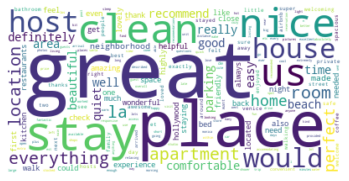

In [276]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white", max_words=1000)
wc.generate_from_frequencies(review_map_new[2015])

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

defaultdict(int,
            {'host': 118,
             'home': 81,
             'message': 2,
             'get': 37,
             'key': 2,
             'house': 115,
             'see': 27,
             'maybe': 5,
             'picture': 8,
             'perfect': 85,
             'staying': 34,
             'night': 38,
             'leaving': 6,
             'next': 26,
             'day': 30,
             'midnight': 2,
             'hiromi': 2,
             'let': 9,
             'leave': 10,
             'bag': 3,
             'want': 23,
             'around': 25,
             'hollywood': 44,
             'departure': 2,
             'nice': 134,
             'wash': 2,
             'going': 12,
             'back': 50,
             'morning': 18,
             'coffee': 25,
             'feel': 39,
             'like': 49,
             'recommended': 13,
             'tight': 2,
             'budget': 3,
             'traveller': 3,
             'backpackers': 1,
           

In [ ]:
https://raw.githubusercontent.com/nltk/nltk_data/ghpages/packages/corpora/stopwords.zip